<a href="https://colab.research.google.com/github/camulro/IA/blob/main/Copia_de_Copia_de_ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

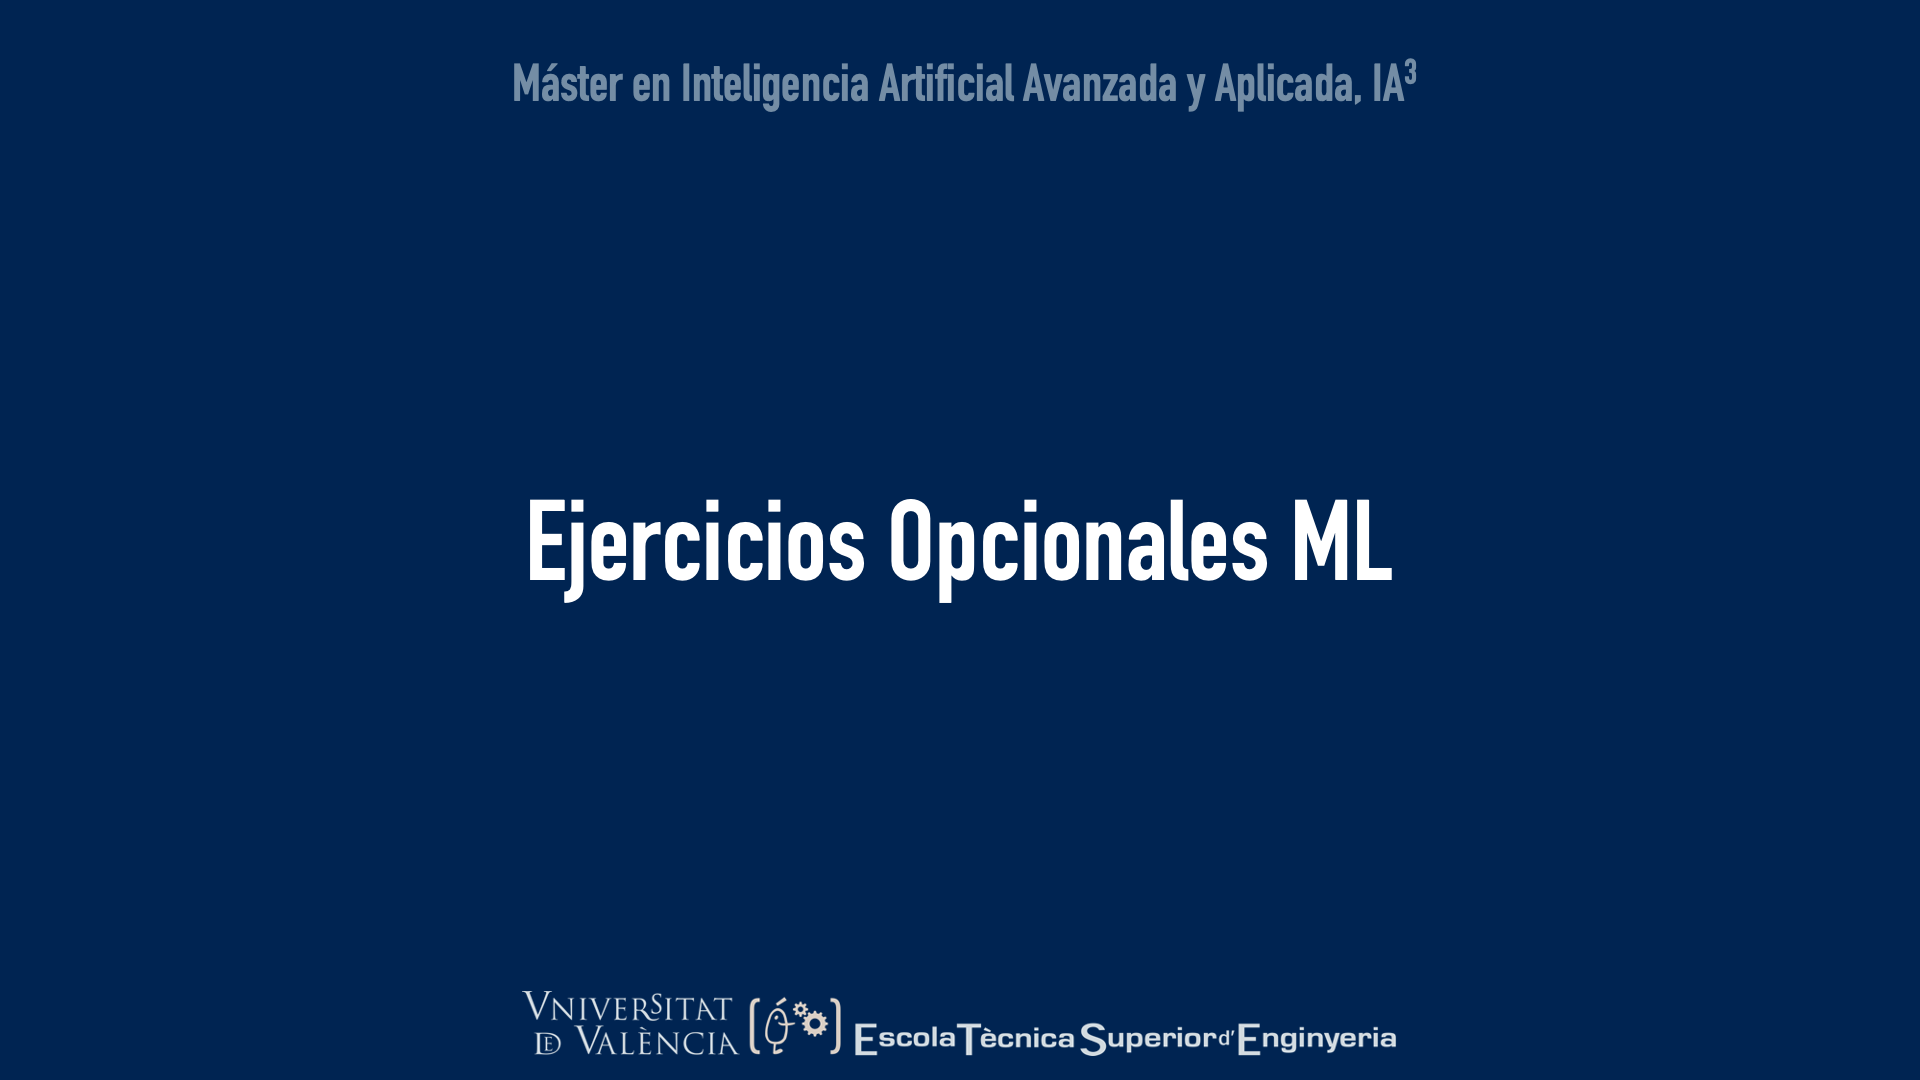

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

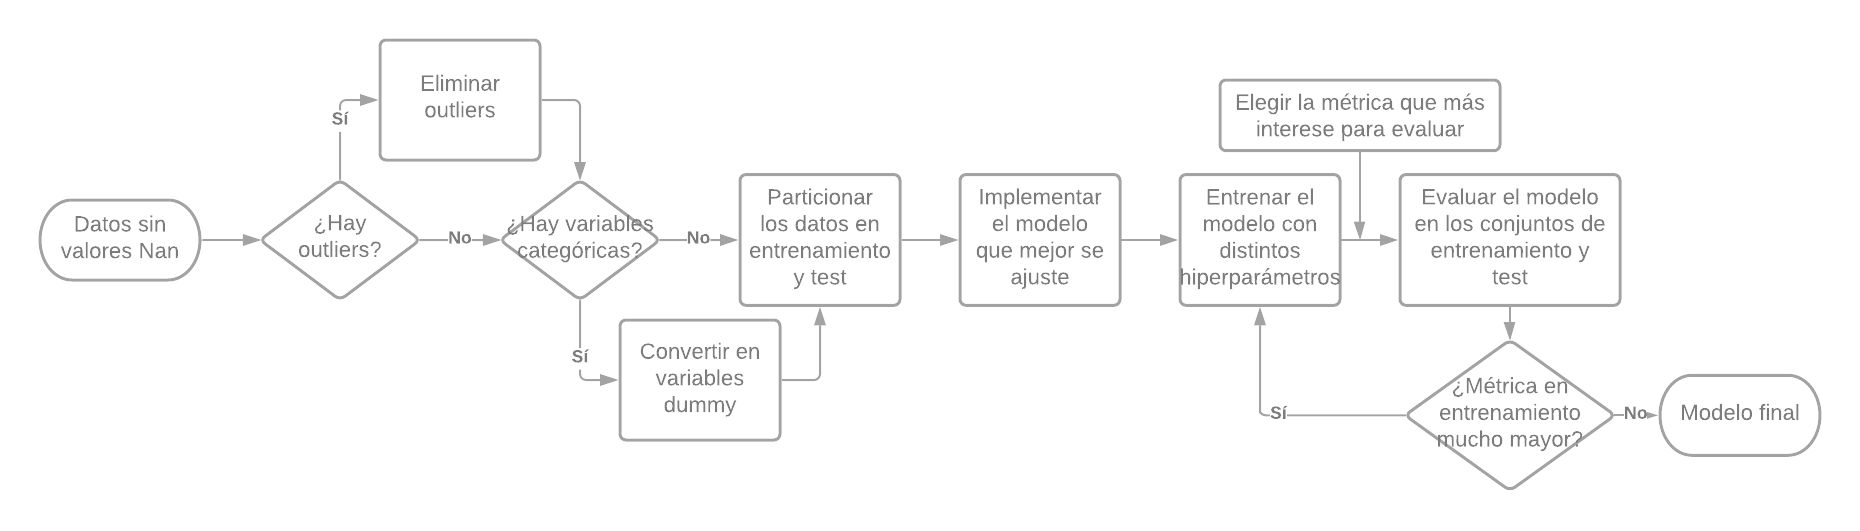

# Exercise 02:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

# **Carga y tratamiento de datos previo**

Comenzaremos importando los datos y realizando un tratamiento para pasar todas las variables categoricas a binarias.

Además eliminaremos registros con valores Na

Por último nos quedaremos como variable objetivo unicamente con una de las dos, puesto que al ser una clasificación binaria, las dos clases se complementan. 


In [ ]:
import seaborn as sns
dataset = sns.load_dataset("penguins")

In [ ]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
dataset.dropna(inplace=True)

Comprobamos si hay outliers. Para ello trabajamos únicamente con las variables numéricas.

In [ ]:
numeric_data = dataset.iloc[:, 2:-1]
numeric_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
describe_df = numeric_data.describe()
iqr = describe_df.loc["75%"] - describe_df.loc["25%"]

ub = describe_df.loc["75%"]+1.5*iqr
lb = describe_df.loc["25%"]-1.5*iqr

bool_index = numeric_data > ub
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
print(dataset.loc[bool_index2])

bool_index = numeric_data < lb
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
print(dataset.loc[bool_index2])

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


Observamos que no hay outliers respecto a cada variable.

In [ ]:
import pandas as pd
penguins=pd.get_dummies(dataset)

In [ ]:
penguins.drop('sex_Female', axis=1,inplace=True)

In [ ]:
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=penguins.iloc[:,0:-1]
y=penguins.loc[:,['sex_Male']]

Como hay variables de órdenes distintos, normalizamos los datos.

In [ ]:
std_scl = StandardScaler()
X = std_scl.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

Una vez hemos realizado un tratamiento previo de la información, procedemos a implementar el modelo de Logistic Regression, el cual se base en la utilización de una funcion de coste que sigmoide

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.8313725490196079

In [ ]:
model.score(X_test, y_test)

0.8588235294117647

In [ ]:
model2=LogisticRegression(penalty='l1',tol=0.01,solver='liblinear',multi_class='ovr',verbose=5)

In [ ]:
model2.fit(X_train,y_train)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=0.01, verbose=5)

In [ ]:
model2.score(X_train, y_train)

0.8745098039215686

In [ ]:
model2.score(X_test, y_test)

0.9058823529411765

Tras una primera prueba del modelo sin realizar ningún ajuste en los hiperparametros, obtenemos unos resultados de 83% para los datos de entrenamiento y el 85.88% para los datos de prueba

Posteriormente realizamos una serie de ajustes en los hiperparámetros:


1.   En primer lugar la función de penalización, al ser un función sigmoide podemos aplicar la funcion l1, que observamos que da mejores resultados que la l2 anterior. 
2.   Posteriormente modificamos la tolerancia de parada, tras probar con diferentes valores vemos que con 0.01 se obtienen mejores resultados
3.   Además para optimizar modificamos el parametro solver a liblinear que funciona bien con pequeños datsets
2.   Al modificar el solver, modificamos el parámetro multi-class en consecuencia, fijandolo en ovr
1.   Fijamos el verbose a 5 que obtiene mejores resultados







**Logistic Regression vs Decision Tress**

Así como los arboles de decision tratan de separa el espacio en pequeñas secciones para agrupar a cada una de las clases, los algoritmos de regresion logística pretenden dividir el espacio con la definición de una linea que separe las clases, para "dibujar" esta linea el algoritmo utiliza la función de coste sigmoide, lo que le diferencia de otros tipos de algoritmo.

Los algoritmos de arboles de decisión funcionan mejor cuando las clases están bien diferenciada, sin encambio cuando no lo están los algoritmos de regresión logística funcionan mejor porque evitan el overfitting en el que los arboles de decisión pueden caer

Ahora procederemos a resorver el mismo problema de clasificación, usando esta vez **Support Vector Machines**. La idea principal de este algoritmo es encontrar una línea o hiperplano que separe los datos del problema en dos clases.

In [ ]:
from sklearn.svm import SVC

En este caso, el kernel que mejor funciona para el SVC es el lineal.

In [ ]:
model = SVC(kernel='linear',  C=1.0)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9236947791164659
0.8928571428571429


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Probamos cambiando el hiperparámetro C y vemos que con el que mejor parece funcionar es con C>1.3

In [ ]:
model = SVC(kernel='linear',  C=1.4)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9317269076305221
0.9047619047619048


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Comparándolo con un árbol de decisión:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy")
model_tree.fit(X_train, y_train)
print(model_tree.score(X_train, y_train))
print(model_tree.score(X_test, y_test))

1.0
0.8928571428571429


Vemos que funciona mejor para los datos de test y no sobreajusta tanto SVC.

Finalizamos con una pequeña **comparación** entre los tres algoritmos.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


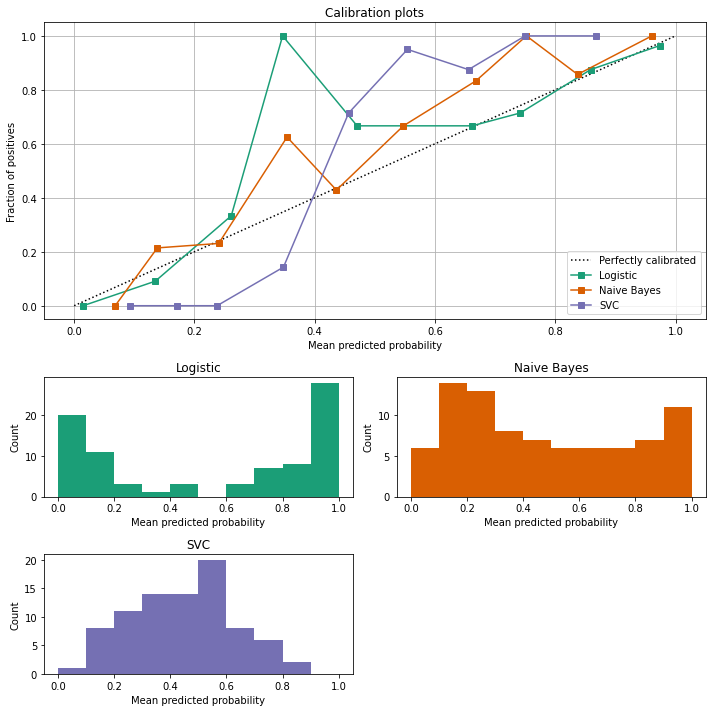

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibrationDisplay
from sklearn.naive_bayes import GaussianNB
import numpy as np

class NaivelyCalibratedLinearSVC(LinearSVC):
    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
]
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()